In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

/Users/kimliya/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [13]:
# Load dataset correctly (very important: sep=';')
df = pd.read_csv('bank.csv', sep=';')

# Clean column names
df.columns = df.columns.str.strip()

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

df.head()


Shape: (4521, 17)
Columns: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [15]:
## Taget variable
print(df['y'].unique())
print(df['y'].value_counts())

['no' 'yes']
y
no     4000
yes     521
Name: count, dtype: int64


In [16]:
# Encode target variable
df['y'] = df['y'].map({'no':0, 'yes':1})

In [17]:
#encode categorical variables
# One-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

print("New Shape:", df_encoded.shape)

New Shape: (4521, 43)


In [18]:
## Split data into features and target
from sklearn.model_selection import train_test_split

X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)

Train shape: (3390, 42)


In [19]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    random_state=42
)

dt_model.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Accuracy: 0.8912466843501327

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      1001
           1       0.54      0.34      0.42       130

    accuracy                           0.89      1131
   macro avg       0.73      0.65      0.68      1131
weighted avg       0.88      0.89      0.88      1131



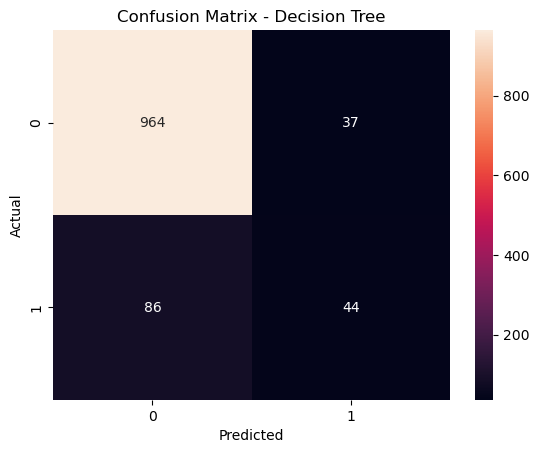

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

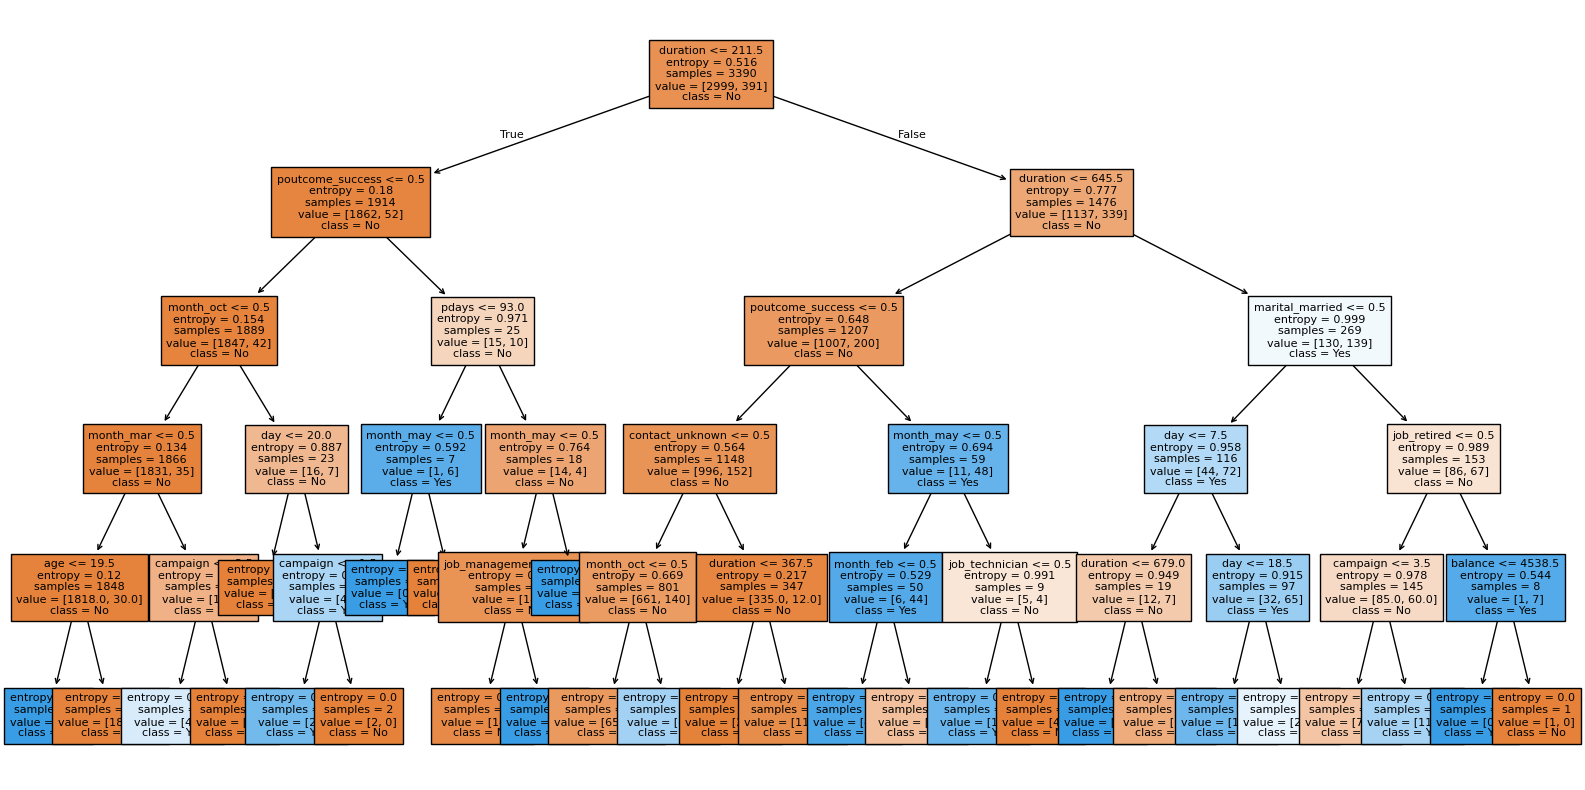

In [21]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))

plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['No','Yes'],
    filled=True,
    fontsize=8
)

plt.show()